# 二次函数的拟合

经过上次的学习，明白了数据应该如何生成，以及简单的拟合一条直线。本次实验目的是拟合一条二次曲线，需要用到含有隐藏层的多层感知机。

## 1.生成数据集

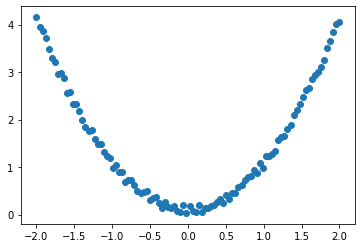

In [1]:
import torch
import numpy as np
import torch.utils.data as data
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

x = torch.linspace(-2, 2, 100)
label = pow(x, 2) + 0.2*torch.rand(x.size())
plt.scatter(x, label)
plt.show()
dataset = data.TensorDataset(x, label)
data_iter = data.DataLoader(dataset=dataset,
                            batch_size=10,
                            shuffle=True)

## 2.定义网络

本次模型的原型是多层感知机，多层感知机含有多个隐藏层，每个隐藏层含有的神经元的个数也各不相同。由于拟合二次函数曲线较为简单，所以本次使用的模型只有一个隐藏层。除此之外，为了加强模型的非线性计算能力，在隐藏层的输出之后还需加入ReLu函数。Relu函数需要用torch.nn.functional实现。

In [2]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(n_input, n_hidden)
        self.predict = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        hidden_output = F.relu(self.hidden(x))
        predict = self.predict(hidden_output)
        return predict
    
net = Net(1, 3, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=3, bias=True)
  (predict): Linear(in_features=3, out_features=1, bias=True)
)


## 3.训练过程

训练100轮

In [3]:
net = Net(1, 3, 1)

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.05)

for epoch in range(100):
    for input, y in data_iter:
        optimizer.zero_grad()
        prediction = net(input.view(10, -1))
        loss = criterion(prediction, y.view(-1, 1))
        loss.backward()
        optimizer.step()
    print('epoch{}, loss:{}'.format(epoch+1, loss))

epoch1, loss:2.0426316261291504
epoch2, loss:0.5247153639793396
epoch3, loss:0.9212309718132019
epoch4, loss:0.9463000297546387
epoch5, loss:0.6272024512290955
epoch6, loss:0.5408734083175659
epoch7, loss:1.605421781539917
epoch8, loss:0.7800281643867493
epoch9, loss:0.20855741202831268
epoch10, loss:0.8772879838943481
epoch11, loss:0.5478005409240723
epoch12, loss:0.22607335448265076
epoch13, loss:0.3503402769565582
epoch14, loss:0.5092839002609253
epoch15, loss:1.0018200874328613
epoch16, loss:0.6322608590126038
epoch17, loss:0.38768526911735535
epoch18, loss:0.11496791988611221
epoch19, loss:0.03793496638536453
epoch20, loss:0.08394710719585419
epoch21, loss:0.13984869420528412
epoch22, loss:0.2533322870731354
epoch23, loss:0.11188431084156036
epoch24, loss:0.08998364955186844
epoch25, loss:0.04302254319190979
epoch26, loss:0.342175155878067
epoch27, loss:0.06802567094564438
epoch28, loss:0.07698068767786026
epoch29, loss:0.08457573503255844
epoch30, loss:0.1754191517829895
epoch31,